In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

Q4 – Customer Behavior Analysis

Bounce Rate Comparison:
Mann-Whitney U p-value: 0.9327
→ No significant correlation between bounce rates and low-conversion days.

Abandoned Cart Rate Comparison:
Mann-Whitney U p-value: 0.0588
→ No significant correlation between abandoned cart rates and low-conversion days.

Returning Visitors on Discount Days:
Mann-Whitney U p-value: nan
→ No significant difference in conversion likelihood for returning visitors during discount days.


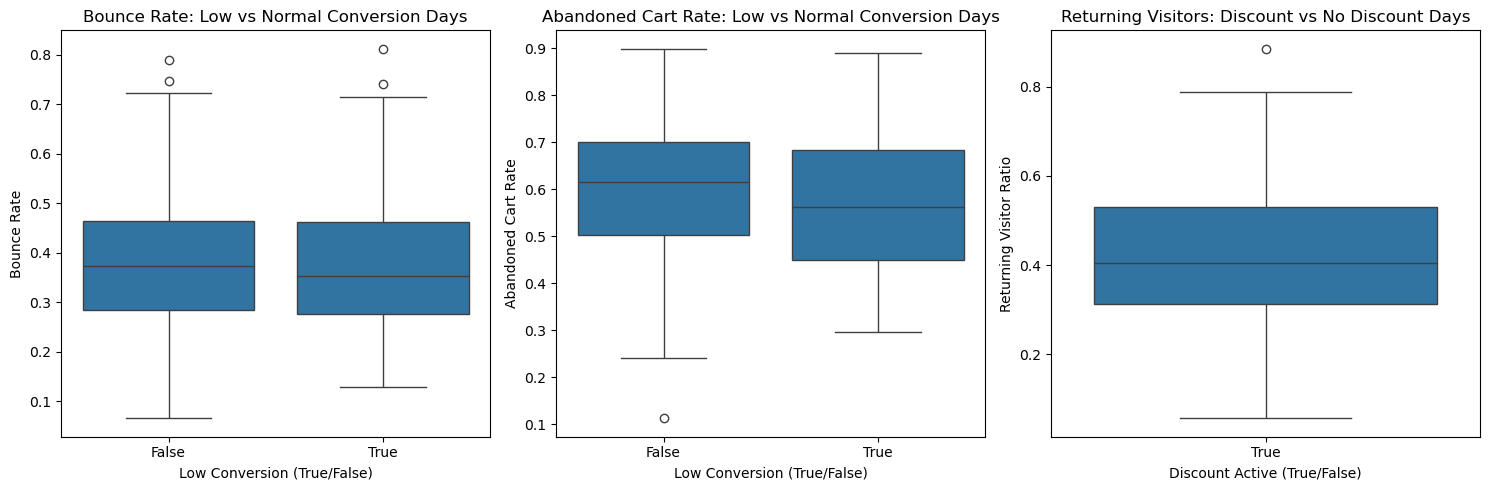

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, mannwhitneyu

df3= pd.read_csv("Sales Data.csv")

df1 = pd.read_csv("Daily Customer Behavior.csv")

# Merge df3 (sales) with df1 (customer behavior) on date
merged = df3.merge(df1, left_on='TransactionDate', right_on='Date', how='left')

# --- Step 2: Define low-conversion days ---

# Example: low-conversion if UnitsSold is below 25th percentile
threshold = merged['UnitsSold'].quantile(0.25)
merged['low_conversion'] = merged['UnitsSold'] < threshold

# --- Step 3: Check correlation with BounceRate and AbandonedCartRate ---

# Compare BounceRate on low vs normal days
bounce_low = merged[merged['low_conversion'] == True]['BounceRate'].dropna()
bounce_high = merged[merged['low_conversion'] == False]['BounceRate'].dropna()

# Compare AbandonedCartRate on low vs normal days
abandoned_low = merged[merged['low_conversion'] == True]['AbandonedCartRate'].dropna()
abandoned_high = merged[merged['low_conversion'] == False]['AbandonedCartRate'].dropna()

# Perform Mann-Whitney U tests
bounce_test = mannwhitneyu(bounce_low, bounce_high, alternative='two-sided')
abandoned_test = mannwhitneyu(abandoned_low, abandoned_high, alternative='two-sided')

# --- Step 4: Check returning visitors on discount days ---

# Define discount days
merged['discount_active'] = merged['SellingPrice'] < merged['MRP']

# Compare ReturningVisitorRatio on discount vs non-discount days
returning_discount = merged[merged['discount_active'] == True]['ReturningVisitorRatio'].dropna()
returning_no_discount = merged[merged['discount_active'] == False]['ReturningVisitorRatio'].dropna()

# Mann-Whitney U test
returning_test = mannwhitneyu(returning_discount, returning_no_discount, alternative='two-sided')

# --- Step 5: Print results ---

print("Q4 – Customer Behavior Analysis\n")

print("Bounce Rate Comparison:")
print(f"Mann-Whitney U p-value: {bounce_test.pvalue:.4f}")
if bounce_test.pvalue < 0.05:
 print("→ High bounce rates are significantly correlated with low-conversion days.")
else:
 print("→ No significant correlation between bounce rates and low-conversion days.")

print("\nAbandoned Cart Rate Comparison:")
print(f"Mann-Whitney U p-value: {abandoned_test.pvalue:.4f}")
if abandoned_test.pvalue < 0.05:
 print("→ High abandoned cart rates are significantly correlated with low-conversion days.")
else:
 print("→ No significant correlation between abandoned cart rates and low-conversion days.")

print("\nReturning Visitors on Discount Days:")
print(f"Mann-Whitney U p-value: {returning_test.pvalue:.4f}")
if returning_test.pvalue < 0.05:
 print("→ Returning visitors are significantly more likely to convert when discounts are active.")
else:
 print("→ No significant difference in conversion likelihood for returning visitors during discount days.")

# --- Step 6: Visualization ---

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='low_conversion', y='BounceRate', data=merged)
plt.title("Bounce Rate: Low vs Normal Conversion Days")
plt.xlabel("Low Conversion (True/False)")
plt.ylabel("Bounce Rate")

plt.subplot(1, 3, 2)
sns.boxplot(x='low_conversion', y='AbandonedCartRate', data=merged)
plt.title("Abandoned Cart Rate: Low vs Normal Conversion Days")
plt.xlabel("Low Conversion (True/False)")
plt.ylabel("Abandoned Cart Rate")

plt.subplot(1, 3, 3)
sns.boxplot(x='discount_active', y='ReturningVisitorRatio', data=merged)
plt.title("Returning Visitors: Discount vs No Discount Days")
plt.xlabel("Discount Active (True/False)")
plt.ylabel("Returning Visitor Ratio")

plt.tight_layout()
plt.show()

